# Prototype for the function to get the background (age, sex, class)

Read and interpret the data for the background of the kids.

#### Changes on 06/02

* To generate class, the Y1 is the basis, and not Y2.

**Last update:** 06/02/2018

In [1]:
import json
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import os
import random
import re
%matplotlib inline

# Demographics

In [2]:
data_f='./data/'
background = pd.read_csv(data_f+'background.csv', sep=';', header=0)

In [3]:
for item in background.columns:
    print(item)

Child_Bosse
School
Class
Wave
Gender
Age
GEN_Background_School
GEN_Background_Grade
GEN_Background_Class
GEN_Background_Sex
GEN_Background_Age
GEN_Background_Nationality
GEN_Background_Mom_Nationality
GEN_Background_Mom_Nationality_other
GEN_Background_Dad_Nationality
GEN_Background_Dad_Nationality_other
GEN_Background_Older_brother
GEN_Background_Older_sister
GEN_Background_Younger_brother
GEN_Background_Younger_sister
PA_Attitude_Attitude_PA1
PA_Attitude_Attitude_PA2
PA_Attitude_Attitude_PA3
PA_Attitude_mean
PA_descript_norms_PA_descript_norm_parents
PA_descript_norms_PA_descript_norm_friends
PA_injunct_norms_PA_norm_expect
PA_injunct_norms_PA_injunct_norm_parents
PA_injunct_norms_PA_injunct_norm_friends
PA_Intentions_PA_intentions
PA_intentions_Pa_Previous_Wave
PA_motivation_PA_motiv_.intrin1
PA_motivation_PA_motiv_.extrin1
PA_motivation_PA_motiv_.intrin2
PA_motivation_PA_motiv_.extrin2
PA_motivation_PA_motiv_.intrin3
PA_motivation_PA_motiv_.intrin4
PA_motivation_PA_motiv_.extrin3
P

# Age

In [4]:
background[background.Child_Bosse == 643]

,Child_Bosse,School,Class,Wave,Gender,Age,GEN_Background_School,GEN_Background_Grade,GEN_Background_Class,GEN_Background_Sex,...,PA_Habit_index_PA_habit9,PA_Habit_index_PA_habit10,PA_Habit_index_PA_habit11,PA_Habit_index_PA_habit12,Habit_mean,PA_Perceiv_comp_PA_perceived_comp1,PA_Perceiv_comp_PA_perceived_comp2,PA_Perceiv_comp_PA_perceived_comp3,PA_Perceiv_comp_PA_perceived_comp4,Perceived_Competence_mean
0,643,22,52.0,1,1,13,0.0,8.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,643,22,52.0,2,1,13,0.0,8.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,643,22,52.0,3,1,13,0.0,8.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,643,22,52.0,4,1,13,0.0,8.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


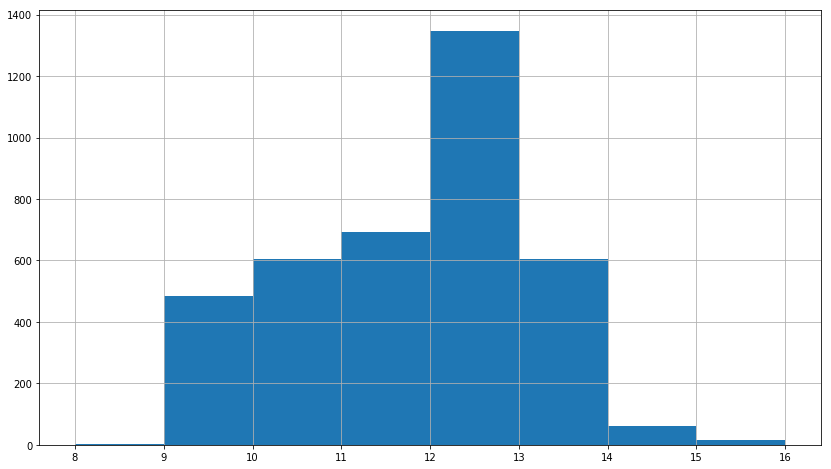

In [5]:
background.Age.hist(bins=8, figsize=((14,8)))

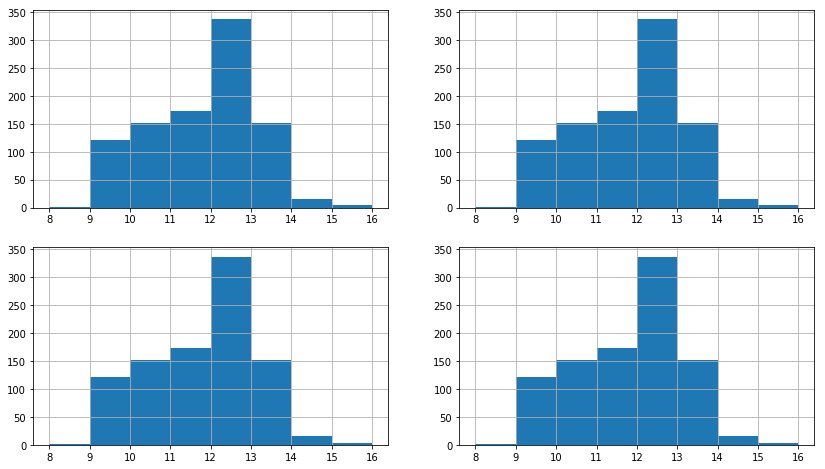

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2)

# df1.plot(ax=axes[0,0])
# df2.plot(ax=axes[0,1])


background[background.Wave == 1].Age.hist(bins=8, ax=axes[0,0], figsize=((14,8)))
background[background.Wave == 2].Age.hist(bins=8, ax=axes[0,1], figsize=((14,8)))
background[background.Wave == 3].Age.hist(bins=8, ax=axes[1,0], figsize=((14,8)))
background[background.Wave == 4].Age.hist(bins=8, ax=axes[1,1], figsize=((14,8)))



# Class

In [7]:
background[background.Child_Bosse == 643]

,Child_Bosse,School,Class,Wave,Gender,Age,GEN_Background_School,GEN_Background_Grade,GEN_Background_Class,GEN_Background_Sex,...,PA_Habit_index_PA_habit9,PA_Habit_index_PA_habit10,PA_Habit_index_PA_habit11,PA_Habit_index_PA_habit12,Habit_mean,PA_Perceiv_comp_PA_perceived_comp1,PA_Perceiv_comp_PA_perceived_comp2,PA_Perceiv_comp_PA_perceived_comp3,PA_Perceiv_comp_PA_perceived_comp4,Perceived_Competence_mean
0,643,22,52.0,1,1,13,0.0,8.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,643,22,52.0,2,1,13,0.0,8.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,643,22,52.0,3,1,13,0.0,8.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,643,22,52.0,4,1,13,0.0,8.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pp = pd.read_csv(data_f+'pp.csv', sep=';', header=0)
list_participants = list(set(pp.Child_Bosse))

In [9]:
pp.head()

,School,Primary,Secondary,Class_Y1,Class_Y2,Child_Bosse,parti_W1,parti_W2,parti_W3,parti_W4
0,22,NaN,1.0,52.0,52.0,643,1,0,0,0
1,22,NaN,1.0,52.0,52.0,645,1,0,0,0
2,22,NaN,1.0,52.0,52.0,648,1,0,0,0
3,22,NaN,1.0,52.0,55.0,649,1,1,0,1
4,22,NaN,1.0,52.0,55.0,650,1,1,0,1


In [10]:
# How many kids changed class from Y1 to Y2
pp[(pp.Class_Y1 != pp.Class_Y2) & (~pd.isna(pp.Class_Y2))].shape

(218, 10)

In [11]:
pp[(pp.Class_Y1 != pp.Class_Y2)].shape

(239, 10)

In [12]:
# How many kids did not changed class from Y1 to Y2
pp[(pp.Class_Y1 == pp.Class_Y2) & (~pd.isna(pp.Class_Y1))].shape

(714, 10)

In [13]:
pp[pd.isna(pp.Class_Y2)].shape

(21, 10)

* 21 kids with NA Class for Y2
* 218 kids with different classes from Y1 to Y2
* 714 kids with same class from Y1 to Y2
* TOTAL: 953

In [14]:
21+218+714

953

In [15]:
# For Y1, 26 missing data points.
pp[pd.isna(pp.Class_Y1)].shape

(26, 10)

In [16]:
# Is the NaN data from Y1 present in Y2?
# No missing data for both years.
pp[(pd.isna(pp.Class_Y1)) & (pd.isna(pp.Class_Y2))].shape

(0, 10)

# Creating Class data

In [17]:
pp['Class'] = pp.Class_Y1

In [18]:
# Fill the missing data at Class column with the data from Y1.
pp.Class.fillna(pp.Class_Y2, inplace=True)

In [19]:
pp[pd.isna(pp.Class)]

,School,Primary,Secondary,Class_Y1,Class_Y2,Child_Bosse,parti_W1,parti_W2,parti_W3,parti_W4,Class


In [20]:
pp.index = pp.Child_Bosse

In [21]:
pp[pd.isna(pp.Class_Y1)].head()

,School,Primary,Secondary,Class_Y1,Class_Y2,Child_Bosse,parti_W1,parti_W2,parti_W3,parti_W4,Class
Child_Bosse,,,,,,,,,,,
2110,35,NaN,1.0,NaN,208.0,2110,1,1,1,1,208.0
2141,35,NaN,1.0,NaN,208.0,2141,1,1,1,1,208.0
2142,35,NaN,1.0,NaN,208.0,2142,1,1,1,1,208.0
2159,35,NaN,1.0,NaN,208.0,2159,1,1,1,1,208.0
2194,35,NaN,1.0,NaN,208.0,2194,1,1,1,1,208.0


# Sex

In [22]:
background[pd.isna(background.Gender)]

,Child_Bosse,School,Class,Wave,Gender,Age,GEN_Background_School,GEN_Background_Grade,GEN_Background_Class,GEN_Background_Sex,...,PA_Habit_index_PA_habit9,PA_Habit_index_PA_habit10,PA_Habit_index_PA_habit11,PA_Habit_index_PA_habit12,Habit_mean,PA_Perceiv_comp_PA_perceived_comp1,PA_Perceiv_comp_PA_perceived_comp2,PA_Perceiv_comp_PA_perceived_comp3,PA_Perceiv_comp_PA_perceived_comp4,Perceived_Competence_mean


No missing data for gender.

In [23]:
gender_df = background.groupby(['Child_Bosse']).mean()['Gender']

In [24]:
gender_df.shape

(953,)